<a href="https://colab.research.google.com/github/danilopez8/GoogleColabSAA/blob/main/Ejercicio_Ingreso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
datos = pd.read_csv('/content/sample_data/ingreso.csv')
datos

,ingreso,horas
0,9973.577534,40.905476
1,8961.047249,41.576483
2,7437.977263,41.369239
3,12064.915290,41.537211
4,9296.396167,40.441203
...,...,...
995,9998.522402,41.110352
996,6867.097603,40.617061
997,9757.539280,40.798085
998,11044.031510,41.443604


In [ ]:
datos.describe()

,ingreso,horas
count,1000.000000,1000.000000
mean,10077.306402,41.275829
std,2490.167110,0.525277
min,1783.853217,39.930111
25%,8407.200717,40.905475
50%,10072.833245,41.270119
75%,11689.680823,41.638858
max,20032.236920,43.031858


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ingreso  1000 non-null   float64
 1   horas    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


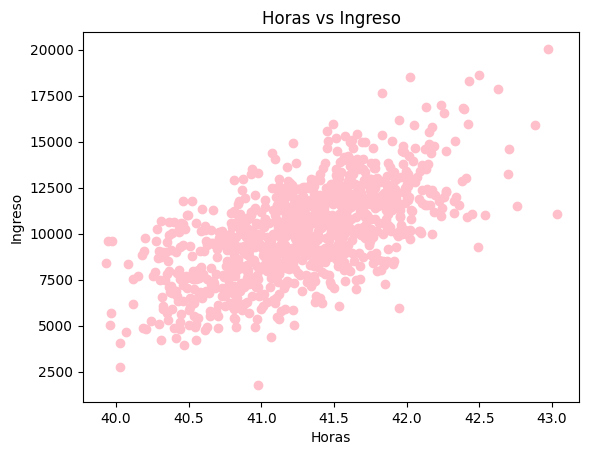

In [ ]:
plt.scatter(datos['horas'], datos['ingreso'], color='pink')
plt.xlabel('Horas')
plt.ylabel('Ingreso')
plt.title('Horas vs Ingreso')
plt.show()

In [ ]:
#MODELO DE REGRESION LINEAL
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

regresion = LinearRegression()

In [ ]:
modelo = regresion.fit(datos[['horas']], datos['ingreso'])

In [ ]:
modelo = regresion.fit(datos['horas'].values.reshape(-1,1), datos['ingreso'])

In [ ]:
datos[['horas']]

,horas
0,40.905476
1,41.576483
2,41.369239
3,41.537211
4,40.441203
...,...
995,41.110352
996,40.617061
997,40.798085
998,41.443604


In [ ]:
print("Pendiente(a)", modelo.coef_)

Pendiente(a) [2965.35614382]


In [ ]:
print("Intersección(b)", modelo.intercept_)

Intersección(b) -112320.22713310868


In [ ]:
a = modelo.coef_[0]
b = modelo.intercept_
print(f"Ecuación y= {a} x{b}")

Ecuación y= 2965.356143820611 x-112320.22713310868


In [ ]:
#Representar la recta con los datos
horas = datos['horas'].values.reshape(-1,1)
prediccion = modelo.predict(horas)


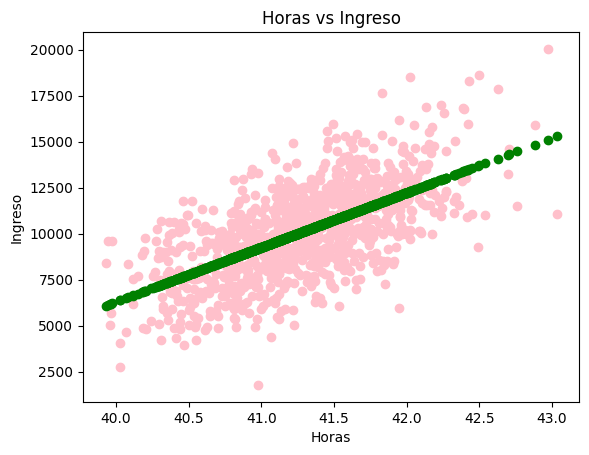

In [ ]:
plt.scatter(datos['horas'], datos['ingreso'], color='pink')
plt.scatter(datos['horas'], prediccion, color='green')
plt.xlabel('Horas')
plt.ylabel('Ingreso')
plt.title('Horas vs Ingreso')
plt.show()

In [ ]:
#R cuadrado
modelo.score(datos[['horas']].values, datos['ingreso'])

0.39126726275722723

In [ ]:
entrada = [[39],[40],[43],[43.5]]
modelo.predict(entrada)

array([ 3328.6624759 ,  6294.01861972, 15190.08705118, 16672.76512309])

In [ ]:
datos[(datos['horas']>=39) & (datos['horas']<40)]

,ingreso,horas
34,5685.523789,39.968722
209,9602.471067,39.973020
485,9578.943984,39.943807
564,8401.547115,39.930111
650,5033.557834,39.957197


In [ ]:
datos[(datos['horas']>=40) & (datos['horas']<41)]

,ingreso,horas
0,9973.577534,40.905476
4,9296.396167,40.441203
6,9517.651813,40.653842
10,9108.724524,40.818291
18,10551.848960,40.816094
...,...,...
981,7812.847164,40.349608
982,5924.159567,40.386918
987,6081.212757,40.838115
996,6867.097603,40.617061


##Ejercicio 2

In [ ]:
from sklearn.metrics import r2_score
np.random.seed(42)

In [ ]:
# Genero datos
X = 2 * np.random.rand(100, 1)        # característica X
y = 3 * X + np.random.randn(100, 1)   # y = 3*X + ruido

# Lo convertimos a DataFrame
datos = np.concatenate((X, y), axis=1)
df = pd.DataFrame(datos, columns=['X1', 'y'])
print("Primeras filas del dataframe:")
print(df.head())

Primeras filas del dataframe:
         X1         y
0  1.496519  4.659287
1  0.369042  1.196520
2  0.418699  1.744140
3  0.740944  3.802967
4  0.969046  2.787287


In [ ]:
# Ajustar regresión lineal con scikit-learn
model = LinearRegression()
model.fit(df[['X1']], df['y'])

# Coeficientes e intercepto
coef = model.coef_[0]
intercept = model.intercept_
print(f"\nCoeficiente (pendiente): {coef:.4f}")
print(f"Intercepto: {intercept:.4f}")

# Predicciones y R^2
y_pred = model.predict(df[['X1']])
r2 = r2_score(df['y'], y_pred)
print(f"R^2: {r2:.4f}")


Coeficiente (pendiente): 3.0023
Intercepto: 0.0543
R^2: 0.7254


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


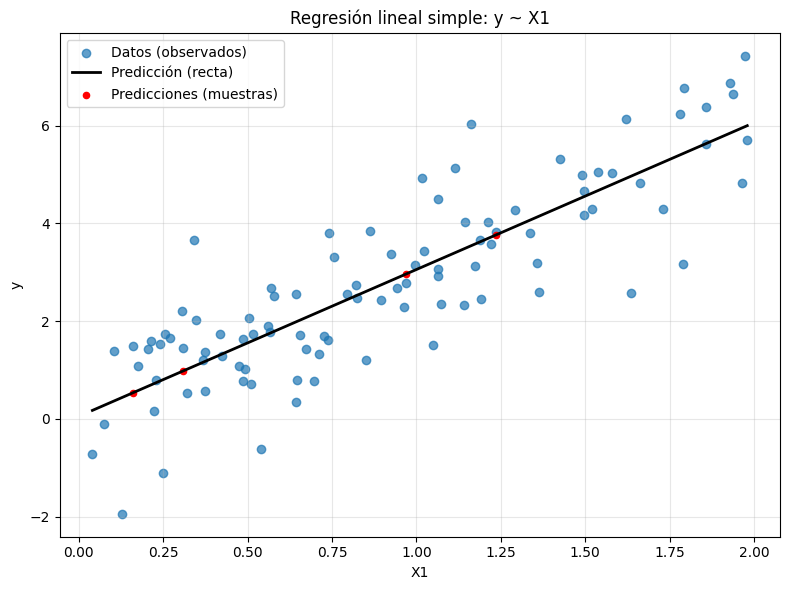

In [ ]:
# Ploteo: puntos y línea de regresión
plt.figure(figsize=(8,6))
plt.scatter(df['X1'], df['y'], color='tab:blue', alpha=0.7, label='Datos (observados)')

# Ordeno X para dibujar la línea correctamente
X_plot = np.linspace(df['X1'].min(), df['X1'].max(), 100).reshape(-1,1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='k', linewidth=2, label='Predicción (recta)')

# Marcar algunas predicciones en rojo
idx_sample = np.random.choice(df.index, size=4, replace=False)
plt.scatter(df.loc[idx_sample,'X1'], y_pred[idx_sample], color='red', marker='.', s=80, label='Predicciones (muestras)')

plt.xlabel('X1')
plt.ylabel('y')
plt.title('Regresión lineal simple: y ~ X1')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('regression_plot.png', dpi=150)
plt.show()

##Ejercicio 4 BOSTON

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [6]:
df = pd.read_csv('/content/sample_data/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

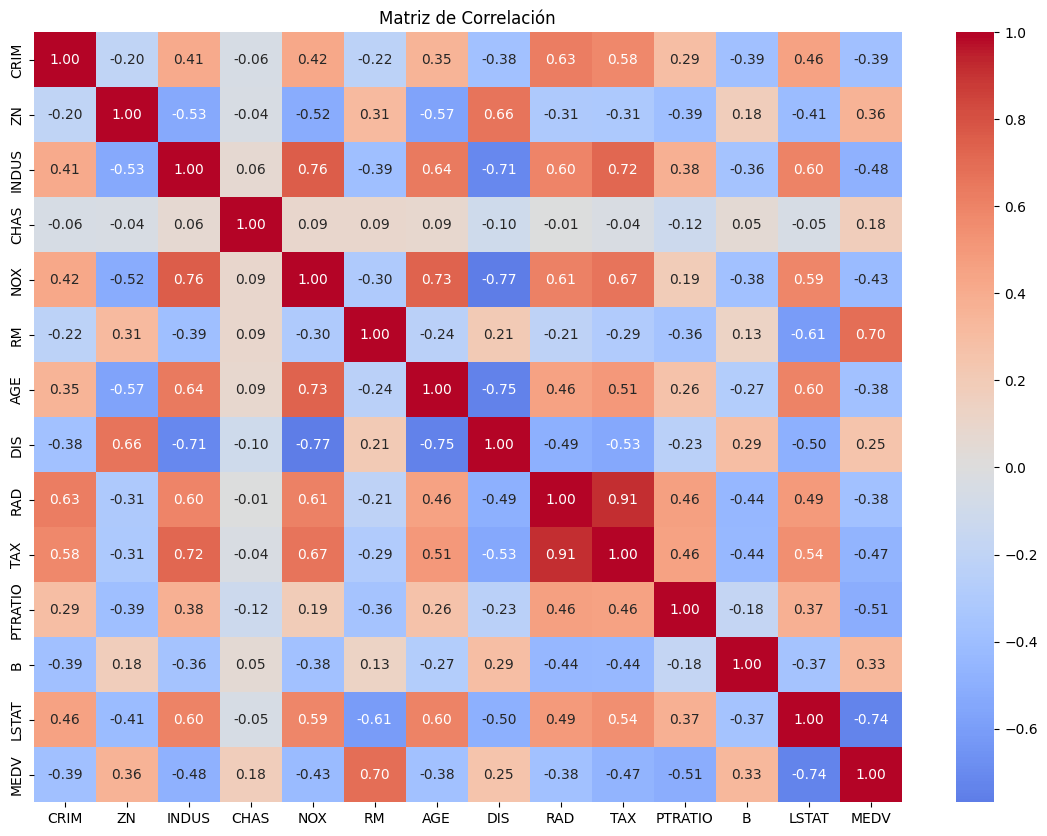


Correlación con MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [7]:
# b) Crear la matriz de correlación de las variables
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualizar
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

# Correlación con MEDV
print("\nCorrelación con MEDV:")
print(correlation_matrix['MEDV'].sort_values(ascending=False))

In [8]:
# c) Regresión lineal múltiple con RM, AGE y DIS
X = df[['RM', 'AGE', 'DIS']]
y = df['MEDV']

# Dividir datos: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Conjunto entrenamiento: {len(X_train)} muestras (80%)")
print(f"Conjunto prueba: {len(X_test)} muestras (20%)")

Conjunto entrenamiento: 404 muestras (80%)
Conjunto prueba: 102 muestras (20%)


In [9]:
# d) Calcular coeficientes y evaluar modelo con r2_score y score
# Coeficientes
print("Ecuación del modelo:")
print(f"MEDV = {model.intercept_:.4f} + {model.coef_[0]:.4f}*RM + {model.coef_[1]:.4f}*AGE + {model.coef_[2]:.4f}*DIS")

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluación con r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Evaluación con score
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print(f"\nr2_score entrenamiento: {r2_train:.4f}")
print(f"r2_score prueba: {r2_test:.4f}")
print(f"\nscore entrenamiento: {score_train:.4f}")
print(f"score prueba: {score_test:.4f}")

Ecuación del modelo:
MEDV = -24.7632 + 8.8561*RM + -0.0946*AGE + -0.4955*DIS

r2_score entrenamiento: 0.5484
r2_score prueba: 0.4607

score entrenamiento: 0.5484
score prueba: 0.4607


In [10]:
# e) Seleccionar características según matriz de correlación y repetir proceso
# Seleccionar variables con mayor correlación con MEDV
correlaciones = correlation_matrix['MEDV'].abs().sort_values(ascending=False)
print("Variables ordenadas por correlación con MEDV:")
print(correlaciones)

# Seleccionar las 5 mejores (excluyendo MEDV)
top_features = correlaciones.drop('MEDV').head(5).index.tolist()
print(f"\nVariables seleccionadas: {top_features}")

# Nuevo modelo
X_mejorado = df[top_features]
X_train_mej, X_test_mej, y_train_mej, y_test_mej = train_test_split(X_mejorado, y, test_size=0.20, train_size=0.80, random_state=42)

model_mejorado = LinearRegression()
model_mejorado.fit(X_train_mej, y_train_mej)

# Evaluación
r2_test_mej = r2_score(y_test_mej, model_mejorado.predict(X_test_mej))

print(f"\nModelo original - R² prueba: {r2_test:.4f}")
print(f"Modelo mejorado - R² prueba: {r2_test_mej:.4f}")
print(f"¿Ha mejorado? {'Sí' if r2_test_mej > r2_test else 'No'}")

Variables ordenadas por correlación con MEDV:
MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

Variables seleccionadas: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']

Modelo original - R² prueba: 0.4607
Modelo mejorado - R² prueba: 0.6197
¿Ha mejorado? Sí


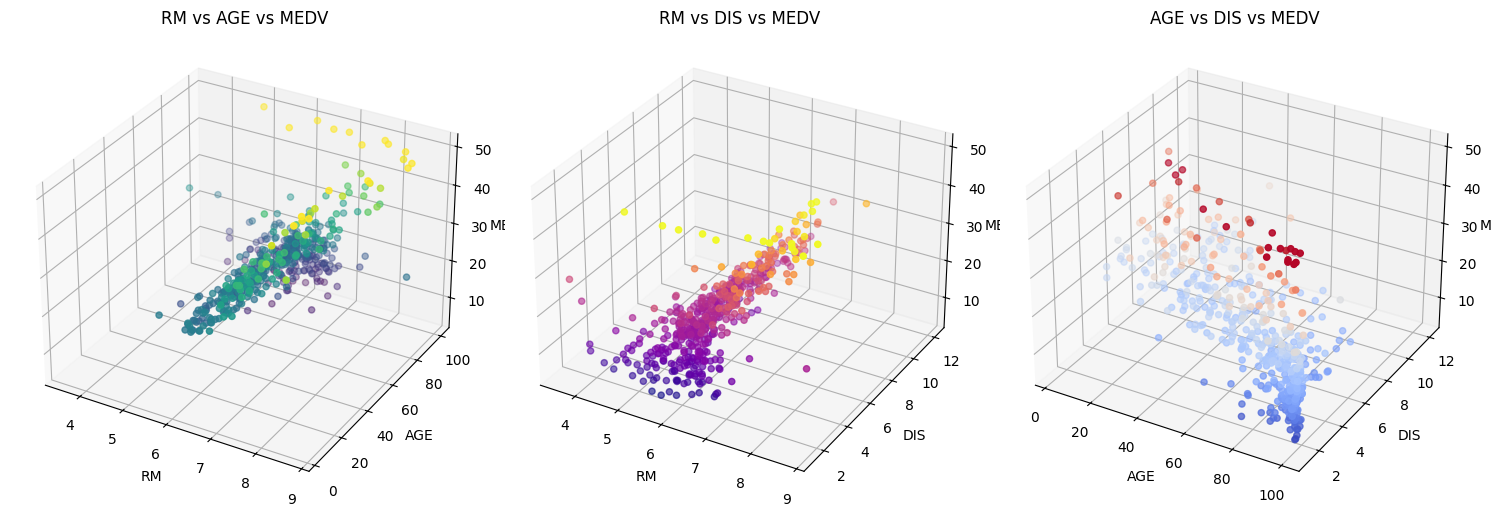

In [11]:
# f) Representar el gráfico en 3D
fig = plt.figure(figsize=(15, 5))

# Gráfico 1: RM vs AGE vs MEDV
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df['RM'], df['AGE'], df['MEDV'], c=df['MEDV'], cmap='viridis')
ax1.set_xlabel('RM')
ax1.set_ylabel('AGE')
ax1.set_zlabel('MEDV')
ax1.set_title('RM vs AGE vs MEDV')

# Gráfico 2: RM vs DIS vs MEDV
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df['RM'], df['DIS'], df['MEDV'], c=df['MEDV'], cmap='plasma')
ax2.set_xlabel('RM')
ax2.set_ylabel('DIS')
ax2.set_zlabel('MEDV')
ax2.set_title('RM vs DIS vs MEDV')

# Gráfico 3: AGE vs DIS vs MEDV
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df['AGE'], df['DIS'], df['MEDV'], c=df['MEDV'], cmap='coolwarm')
ax3.set_xlabel('AGE')
ax3.set_ylabel('DIS')
ax3.set_zlabel('MEDV')
ax3.set_title('AGE vs DIS vs MEDV')

plt.tight_layout()
plt.show()